In [1]:
# Dependencies
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import plotly.graph_objects as go
import datetime as DT
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# API Calls

## Covid Tracking
https://covidtracking.com/api

The following fields are deprecated and are no longer being updated with new data.

/api/v1/states/current.json:
- positiveScore
- negativeScore
- negativeRegularScore
- commercialScore
- score
- grade - Use dataQualityGrade instead
- total

/api/v1/us/current.json
- posNeg
- total

In [2]:
url = "https://covidtracking.com/api/v1"

# Current state data - /api/v1/states/current 
region = "states"
time = "current"
state_current = requests.get(f"{url}/{region}/{time}.json").json()

# Historic state data - /api/v1/states/daily 
region = "states"
time = "daily"
state_daily = requests.get(f"{url}/{region}/{time}.json").json()

# Current US data - /api/v1/us/current
region = "us"
time = "current"
us_current = requests.get(f"{url}/{region}/{time}.json").json()

# Historic US data - /api/v1/us/daily
region = "us"
time = "daily"

us_daily = requests.get(f"{url}/{region}/{time}.json").json()

## Census Popoulation

https://api.census.gov/data/2019/pep/population.html

https://www.census.gov/data/developers/data-sets/popest-popproj/popest.Vintage_2019.html

In [3]:
pop_url = "https://api.census.gov/data/2019/pep/population?get=STATE,POP,NAME&for=state:*"
pop_state = requests.get(f"{pop_url}").json()

## API Calls into Dataframes

In [4]:
pop_df = pd.DataFrame(pop_state, columns = pop_state[0]) 
pop_df = pop_df.drop(pop_df.index[0])
pop_df.head()

,STATE,POP,NAME,state
1,28,2976149,Mississippi,28
2,29,6137428,Missouri,29
3,30,1068778,Montana,30
4,31,1934408,Nebraska,31
5,32,3080156,Nevada,32


In [5]:
state_daily_df = pd.DataFrame(state_daily)
state_daily_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200623,AK,778.0,92169.0,NaN,14.0,NaN,NaN,NaN,1.0,...,92947,0,0,f35d9d60a800f017ff47a041f47e0d05531a0a5d,0,0,0,0,0,
1,20200623,AL,31097.0,322941.0,NaN,680.0,2521.0,NaN,737.0,NaN,...,354038,23,50,d0d195d69fd8e81e5ab80f001a6c0919dbdcf204,0,0,0,0,0,
2,20200623,AR,16678.0,247814.0,NaN,248.0,1188.0,NaN,NaN,57.0,...,264492,10,24,85ada121319e67e007e948504ed59ad41d6e8df9,0,0,0,0,0,
3,20200623,AS,0.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,...,174,0,0,0d9d878b490e6460c45ff06c325b3f28f1419ee8,0,0,0,0,0,
4,20200623,AZ,58179.0,382339.0,NaN,2136.0,4255.0,614.0,NaN,386.0,...,440518,42,0,d80761e660fa46dfc4d7747eba8a6bcb8216783c,0,0,0,0,0,


In [6]:
state_current_df = pd.DataFrame(state_current)
state_current_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200623,AK,778,92169.0,NaN,14.0,NaN,NaN,NaN,1.0,...,92947,0,0,f35d9d60a800f017ff47a041f47e0d05531a0a5d,0,0,0,0,0,
1,20200623,AL,31097,322941.0,NaN,680.0,2521.0,NaN,737.0,NaN,...,354038,23,50,d0d195d69fd8e81e5ab80f001a6c0919dbdcf204,0,0,0,0,0,
2,20200623,AR,16678,247814.0,NaN,248.0,1188.0,NaN,NaN,57.0,...,264492,10,24,85ada121319e67e007e948504ed59ad41d6e8df9,0,0,0,0,0,
3,20200623,AS,0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,...,174,0,0,0d9d878b490e6460c45ff06c325b3f28f1419ee8,0,0,0,0,0,
4,20200623,AZ,58179,382339.0,NaN,2136.0,4255.0,614.0,NaN,386.0,...,440518,42,0,d80761e660fa46dfc4d7747eba8a6bcb8216783c,0,0,0,0,0,


# Data Merging

In [7]:
states_dict = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [8]:
state_daily_df['state_name']=state_daily_df['state'].map(states_dict)

# check if any values did not map
# state_daily_df[state_daily_df['state_name'].isnull()]

state_daily_merged_df = pd.merge (state_daily_df, pop_df, how = "outer", left_on = ["state_name"], right_on = ["NAME"] )

# check if any items did not merge.
# current API call for population is lacking data from American Samoa, Guam, Northern Mariana Islands, Virgin Islands.
# state_daily_df_merged[state_daily_df_merged['NAME'].isnull()]['state_name'].unique()

# Keep the correctly merged items.
state_daily_merged_df = state_daily_merged_df[state_daily_merged_df['NAME'].isnull() == False]

state_daily_merged_df = state_daily_merged_df.rename(columns = {"state_x": "state",
                                      "POP": "2019 population"})
state_daily_merged_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,negativeRegularScore,negativeScore,positiveScore,score,grade,state_name,STATE,2019 population,NAME,state_y
0,20200623,AK,778.0,92169.0,NaN,14.0,NaN,NaN,NaN,1.0,...,0,0,0,0,,Alaska,02,731545,Alaska,02
1,20200622,AK,761.0,90063.0,NaN,13.0,NaN,NaN,NaN,1.0,...,0,0,0,0,,Alaska,02,731545,Alaska,02
2,20200621,AK,755.0,87296.0,NaN,15.0,NaN,NaN,NaN,1.0,...,0,0,0,0,,Alaska,02,731545,Alaska,02
3,20200620,AK,743.0,86175.0,NaN,16.0,NaN,NaN,NaN,1.0,...,0,0,0,0,,Alaska,02,731545,Alaska,02
4,20200619,AK,722.0,82909.0,NaN,18.0,NaN,NaN,NaN,1.0,...,0,0,0,0,,Alaska,02,731545,Alaska,02


In [9]:
state_current_df['state_name']=state_current_df['state'].map(states_dict)

# check if any values did not map
# state_daily_df[state_daily_df['state_name'].isnull()]

state_current_merged_df = pd.merge (state_current_df, pop_df, how = "outer", left_on = ["state_name"], right_on = ["NAME"] )

# check if any items did not merge.
# current API call for population is lacking data from American Samoa, Guam, Northern Mariana Islands, Virgin Islands.
# state_current_df_merged[state_current_df_merged['NAME'].isnull()]['state_name'].unique()

# Keep the correctly merged items.
state_current_merged_df = state_current_merged_df[state_current_merged_df['NAME'].isnull() == False]

state_current_merged_df = state_current_merged_df.rename(columns = {"state_x": "state",
                                      "POP": "2019 population"})
state_current_merged_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,negativeRegularScore,negativeScore,positiveScore,score,grade,state_name,STATE,2019 population,NAME,state_y
0,20200623,AK,778,92169.0,NaN,14.0,NaN,NaN,NaN,1.0,...,0,0,0,0,,Alaska,02,731545,Alaska,02
1,20200623,AL,31097,322941.0,NaN,680.0,2521.0,NaN,737.0,NaN,...,0,0,0,0,,Alabama,01,4903185,Alabama,01
2,20200623,AR,16678,247814.0,NaN,248.0,1188.0,NaN,NaN,57.0,...,0,0,0,0,,Arkansas,05,3017804,Arkansas,05
4,20200623,AZ,58179,382339.0,NaN,2136.0,4255.0,614.0,NaN,386.0,...,0,0,0,0,,Arizona,04,7278717,Arizona,04
5,20200623,CA,183073,3313856.0,NaN,5065.0,NaN,1421.0,NaN,NaN,...,0,0,0,0,,California,06,39512223,California,06


# Select Columns

In [10]:
state_daily_merged_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'state_name', 'STATE', '2019 population', 'NAME', 'state_y'],
      dtype='object')

In [11]:
select_columns_daily = ['date', 'state', 'positive', 'totalTestResults', "2019 population", "positiveIncrease", "totalTestResultsIncrease"]
state_daily_analysis_df_pre = state_daily_merged_df[select_columns_daily]
state_daily_analysis_df_pre.columns = map(str.lower, state_daily_analysis_df_pre.columns)
state_daily_analysis_df_pre.head()

,date,state,positive,totaltestresults,2019 population,positiveincrease,totaltestresultsincrease
0,20200623,AK,778.0,92947,731545,17,2123
1,20200622,AK,761.0,90824,731545,6,2773
2,20200621,AK,755.0,88051,731545,12,1133
3,20200620,AK,743.0,86918,731545,21,3287
4,20200619,AK,722.0,83631,731545,14,2446


In [12]:
state_current_merged_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'state_name', 'STATE', '2019 population', 'NAME', 'state_y'],
      dtype='object')

In [13]:
select_columns_current = ['state', 'positive', 'totalTestResults', "2019 population"]
state_current_analysis_df_pre = state_current_merged_df[select_columns_current]
state_current_analysis_df_pre.columns = map(str.lower, state_current_analysis_df_pre.columns)
state_current_analysis_df_pre.head()

,state,positive,totaltestresults,2019 population
0,AK,778,92947,731545
1,AL,31097,354038,4903185
2,AR,16678,264492,3017804
4,AZ,58179,440518,7278717
5,CA,183073,3496929,39512223


# Data Cleaning

In [14]:
# checking for null date values
# state_daily_analysis[state_daily_analysis['date'].isnull()]
state_daily_date = state_daily_analysis_df_pre.copy()
state_daily_date['year'] = state_daily_date['date'].astype('str').str[:4]
state_daily_date['month'] = state_daily_date['date'].astype('str').str[4:6]
state_daily_date['day'] = state_daily_date['date'].astype('str').str[6:]
state_daily_date ['date'] = state_daily_date['month']+"-"+state_daily_date['day']+"-"+state_daily_date['year']
state_daily_date ['full_date'] = pd.to_datetime(state_daily_date['date'], format='%m-%d-%Y')
state_daily_date ['full_date'] = state_daily_date ['full_date'].dt.strftime("%m-%d-%Y")
state_daily_date
select_columns = ['full_date', 'state','positive', 'totaltestresults', '2019 population', 'positiveincrease', 'totaltestresultsincrease']
state_daily_analysis_df = state_daily_date[select_columns]
state_daily_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,positiveincrease,totaltestresultsincrease
0,06-23-2020,AK,778.0,92947,731545,17,2123
1,06-22-2020,AK,761.0,90824,731545,6,2773
2,06-21-2020,AK,755.0,88051,731545,12,1133
3,06-20-2020,AK,743.0,86918,731545,21,3287
4,06-19-2020,AK,722.0,83631,731545,14,2446


In [15]:
state_current_date = state_current_analysis_df_pre.copy()
state_current_date['full_date'] = pd.to_datetime('today').strftime("%m-%d-%Y")

select_columns = ['full_date', 'state','positive', 'totaltestresults', '2019 population']
state_current_analysis_df = state_current_date[select_columns]
state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population
0,06-24-2020,AK,778,92947,731545
1,06-24-2020,AL,31097,354038,4903185
2,06-24-2020,AR,16678,264492,3017804
4,06-24-2020,AZ,58179,440518,7278717
5,06-24-2020,CA,183073,3496929,39512223


# Creating Calculated Columns (daily and current)

In [16]:
state_daily_analysis_df ['tests per 1000'] =  state_daily_analysis_df['totaltestresults'].astype(int)/state_daily_analysis_df['2019 population'].astype(int)*1000

state_daily_analysis_df.head()

state_current_analysis_df ['tests per 1000'] =  state_current_analysis_df['totaltestresults'].astype(int)/state_current_analysis_df['2019 population'].astype(int)*1000

state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000
0,06-24-2020,AK,778,92947,731545,127.055752
1,06-24-2020,AL,31097,354038,4903185,72.205719
2,06-24-2020,AR,16678,264492,3017804,87.643863
4,06-24-2020,AZ,58179,440518,7278717,60.521380
5,06-24-2020,CA,183073,3496929,39512223,88.502462


In [17]:
state_daily_analysis_df ['positives per 1000'] =  state_daily_analysis_df['positive'].astype(int)/state_daily_analysis_df['2019 population'].astype(int)*1000

state_daily_analysis_df.head()

state_current_analysis_df ['positives per 1000'] =  state_current_analysis_df['positive'].astype(int)/state_current_analysis_df['2019 population'].astype(int)*1000

state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000,positives per 1000
0,06-24-2020,AK,778,92947,731545,127.055752,1.063503
1,06-24-2020,AL,31097,354038,4903185,72.205719,6.342204
2,06-24-2020,AR,16678,264492,3017804,87.643863,5.526535
4,06-24-2020,AZ,58179,440518,7278717,60.521380,7.993030
5,06-24-2020,CA,183073,3496929,39512223,88.502462,4.633326


In [18]:
state_daily_analysis_df['positives%'] = state_daily_analysis_df['positive'].astype(int)/state_daily_analysis_df['totaltestresults'].astype(int)

state_daily_analysis_df.head()

state_current_analysis_df['positives%'] = state_current_analysis_df['positive'].astype(int)/state_current_analysis_df['totaltestresults'].astype(int)

state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000,positives per 1000,positives%
0,06-24-2020,AK,778,92947,731545,127.055752,1.063503,0.008370
1,06-24-2020,AL,31097,354038,4903185,72.205719,6.342204,0.087835
2,06-24-2020,AR,16678,264492,3017804,87.643863,5.526535,0.063057
4,06-24-2020,AZ,58179,440518,7278717,60.521380,7.993030,0.132070
5,06-24-2020,CA,183073,3496929,39512223,88.502462,4.633326,0.052353


# Creating Calculated Columns (for weekly positive)

In [19]:
state_positive_analysis_df = state_daily_analysis_df.copy()
state_positive_analysis_df['full_date'] = pd.to_datetime(state_positive_analysis_df['full_date'])

state_positive_analysis_df['week_start'] = state_positive_analysis_df['full_date'] - state_positive_analysis_df['full_date'].dt.weekday*np.timedelta64(1,'D')

weekly_pos = state_positive_analysis_df.groupby(['state', 'week_start'])['positiveincrease'].sum().reset_index()
weekly_total = state_positive_analysis_df.groupby(['state', 'week_start'])['totaltestresultsincrease'].sum().reset_index()

weekly_pos_total_df = pd.merge (weekly_pos, weekly_total, how = "left", left_on = ["state", "week_start"], right_on = ["state", "week_start"] ).set_index('state')

weekly_pos_total_df['positives%'] = weekly_pos_total_df['positiveincrease'].astype(int)/weekly_pos_total_df['totaltestresultsincrease'].astype(int)

weekly_pos_total_df['week_ends'] = weekly_pos_total_df['week_start'] + DT.timedelta(days=6)

weekly_pos_total_df

,week_start,positiveincrease,totaltestresultsincrease,positives%,week_ends
state,,,,,
AK,2020-03-02,0,6,0.000000,2020-03-08
AK,2020-03-09,1,130,0.007692,2020-03-15
AK,2020-03-16,21,824,0.025485,2020-03-22
AK,2020-03-23,80,2366,0.033812,2020-03-29
AK,2020-03-30,83,2950,0.028136,2020-04-05
...,...,...,...,...,...
WY,2020-05-25,90,4359,0.020647,2020-05-31
WY,2020-06-01,44,4358,0.010096,2020-06-07
WY,2020-06-08,113,4314,0.026194,2020-06-14


# Creating HeatMap for Tests per Capita

In [20]:
# calculating last 10 weeks Option 1
today = pd.to_datetime('today')
# option 2 - week ends (sundays)
today = today - DT.timedelta(today.weekday()+1)

last_ten_weeks = []

for i in range (10):
    delta = 7*(i)
    delta_date = today - DT.timedelta(days=delta)
        
    last_ten_weeks.append(delta_date.date().strftime("%m-%d-%Y"))
#     last_ten_weeks.append(delta_date.date())
#
    print (delta_date)
last_ten_weeks

2020-06-21 11:14:16.974313
2020-06-14 11:14:16.974313
2020-06-07 11:14:16.974313
2020-05-31 11:14:16.974313
2020-05-24 11:14:16.974313
2020-05-17 11:14:16.974313
2020-05-10 11:14:16.974313
2020-05-03 11:14:16.974313
2020-04-26 11:14:16.974313
2020-04-19 11:14:16.974313


['06-21-2020',
 '06-14-2020',
 '06-07-2020',
 '05-31-2020',
 '05-24-2020',
 '05-17-2020',
 '05-10-2020',
 '05-03-2020',
 '04-26-2020',
 '04-19-2020']

In [21]:
# Creating Pivot Tables

# "avg works because there isn't more than one value per crosssection"
state_daily_test_pivot=state_daily_analysis_df.pivot_table(index=['state'], values = 'tests per 1000', columns = "full_date", aggfunc = 'mean')

today = last_ten_weeks[0]

state_daily_test_pivot_final = state_daily_test_pivot[last_ten_weeks]
state_daily_test_pivot_final = state_daily_test_pivot_final.iloc[:, ::-1]
state_daily_test_pivot_final.columns = state_daily_test_pivot_final.columns.astype(str)
# pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('precision', 1)
state_daily_test_pivot_final= state_daily_test_pivot_final.sort_values(by = [today], ascending = False)
state_daily_test_pivot_final

full_date,04-19-2020,04-26-2020,05-03-2020,05-10-2020,05-17-2020,05-24-2020,05-31-2020,06-07-2020,06-14-2020,06-21-2020
state,,,,,,,,,,
RI,32.800905,50.410578,67.896590,86.101905,106.243292,125.265136,145.836028,161.171687,180.786342,202.564565
NY,31.745088,41.398590,50.680233,60.811386,72.654873,87.378655,106.089831,128.400245,150.851507,174.534575
NJ,19.216882,25.122633,30.968263,35.176798,54.892431,67.979519,84.004620,108.129301,123.574929,140.164419
NM,17.470190,25.626792,35.741589,46.285606,61.323074,80.654646,92.733838,109.282636,123.516987,139.940358
LA,29.114648,30.768410,37.893699,46.436129,57.040600,67.982363,80.689529,93.371528,109.562179,131.391496
ND,17.885684,27.185452,43.766780,58.878411,72.462608,85.935265,94.532991,104.890416,114.006472,126.201018
AK,13.526167,22.113472,29.496477,37.405765,47.366874,59.472760,70.665509,88.721815,100.427178,120.363067
DC,19.410584,25.601170,32.734017,41.898749,51.754944,73.667834,65.863359,77.289518,91.434774,112.677453
MA,24.536079,34.254610,45.650470,56.349486,66.859021,77.239430,86.014181,94.666625,103.403655,112.197267


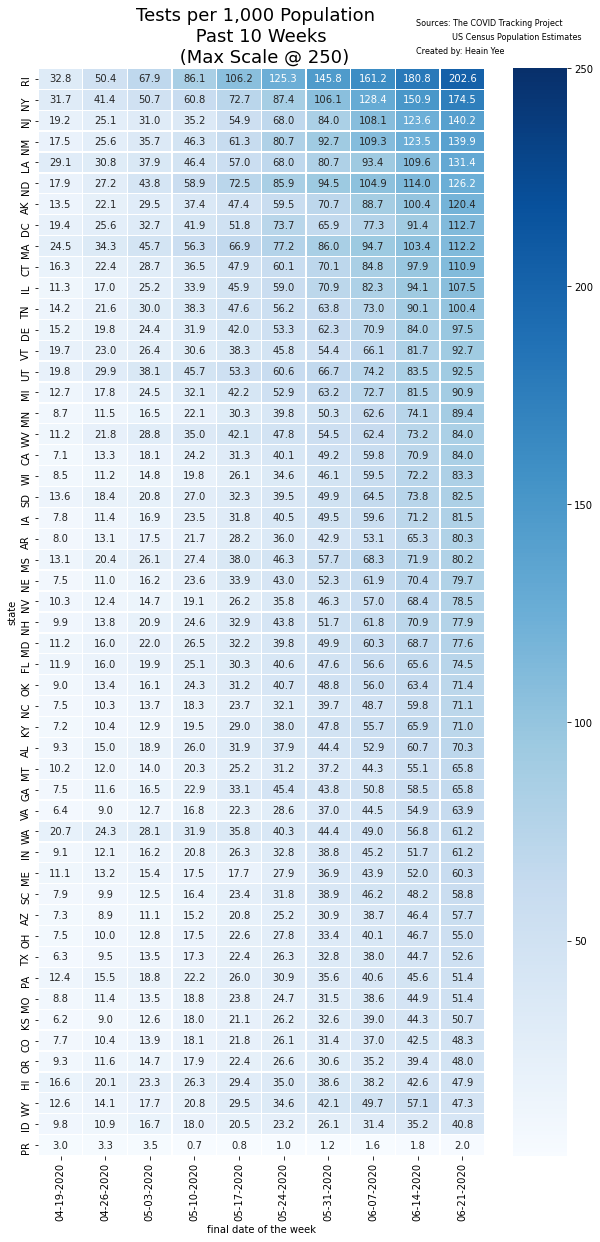

In [22]:
max_scale_tests = 250

fig, ax = plt.subplots(figsize=(10,20))
title = "Tests per 1,000 Population  \n Past 10 Weeks \n (Max Scale @ 250)"

plt.title(title, fontsize=18)

sns.heatmap(state_daily_test_pivot_final, cmap = 'Blues', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax, vmax = max_scale_tests)

plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

textstr = "US Census Population Estimates"
plt.gcf().text(.70, .90, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/HM_testsper1000")

plt.show()

# Creating HeatMap for Positive Tests

In [23]:
weekly_pos_total_pivot=weekly_pos_total_df.pivot_table(index=['state'], values = 'positives%', columns = "week_ends", aggfunc = 'mean')
weekly_pos_total_pivot

week_ends,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,2020-03-15,2020-03-22,2020-03-29,2020-04-05,...,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24,2020-05-31,2020-06-07,2020-06-14,2020-06-21,2020-06-28
state,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,0.000000,0.007692,0.025485,0.033812,0.028136,...,0.003502,0.004999,0.001901,0.002333,0.001355,0.003175,0.008328,0.013663,0.006445,0.004698
AL,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,0.080666,0.197166,0.122404,...,0.051475,0.076785,0.058761,0.068927,0.086794,0.112616,0.061814,0.135000,0.093302,0.114957
AR,NaN,NaN,NaN,NaN,NaN,NaN,0.141593,0.196830,0.101281,0.051868,...,0.076016,0.036510,0.025004,0.051483,0.049709,0.063581,0.070648,0.083751,0.058371,0.069009
AZ,NaN,NaN,NaN,NaN,NaN,0.150000,0.083333,0.465116,0.057077,0.099719,...,0.135099,0.129630,0.084729,0.068094,0.075345,0.086539,0.123247,0.155997,0.204397,0.278666
CA,NaN,NaN,NaN,NaN,NaN,1.000000,0.311077,0.106870,0.310949,0.085626,...,0.048254,0.060380,0.054453,0.043490,0.039916,0.049359,0.043676,0.045575,0.048272,0.052056
CO,NaN,NaN,NaN,NaN,NaN,0.086022,0.190402,0.090717,0.181756,0.235693,...,0.232796,0.161919,0.143891,0.089889,0.095131,0.069793,0.054034,0.036960,0.039475,0.037513
CT,NaN,NaN,NaN,NaN,NaN,0.033333,0.165217,0.068697,0.201136,0.323835,...,0.357394,0.177145,0.154049,0.095633,0.070045,0.048260,0.033781,0.023956,0.014399,0.016909
DC,NaN,NaN,NaN,NaN,NaN,0.200000,0.178571,0.085417,0.138952,0.163062,...,0.239872,0.233413,0.194187,0.122340,0.054510,-0.151598,0.065848,0.043574,0.016876,0.019577
DE,NaN,NaN,NaN,NaN,NaN,NaN,0.187500,1.000000,1.000000,0.065566,...,0.335802,0.261586,0.169680,0.124466,0.103498,0.078287,0.053327,0.025176,0.038750,0.028103


In [24]:
weekly_pos_total_pivot_final = weekly_pos_total_pivot[weekly_pos_total_pivot.columns[-11:-1]]
weekly_pos_total_pivot_final.columns = weekly_pos_total_pivot_final.columns.astype(str)
merge_rank = state_daily_test_pivot_final.reset_index()['state']
weekly_pos_total_pivot_final = pd.merge (merge_rank, weekly_pos_total_pivot_final, how = "left", left_on = ["state"], right_on = ["state"] ).set_index('state')
weekly_pos_total_pivot_final

,2020-04-19,2020-04-26,2020-05-03,2020-05-10,2020-05-17,2020-05-24,2020-05-31,2020-06-07,2020-06-14,2020-06-21
state,,,,,,,,,,
RI,0.145159,0.143876,0.110019,0.093176,0.065614,0.069029,0.039602,0.031577,0.024352,0.016904
NY,0.346846,0.241002,0.157121,0.096303,0.063915,0.039779,0.025426,0.016882,0.011968,0.010010
NJ,0.533547,0.452513,0.341012,0.315347,0.044553,0.067273,0.044198,0.017356,0.019805,0.015344
NM,0.078589,0.050401,0.050545,0.047311,0.034220,0.023140,0.032731,0.033890,0.027507,0.027412
LA,0.106475,0.370057,0.077497,0.056910,0.057447,0.053808,0.046502,0.049189,0.050527,0.031129
ND,0.084451,0.039791,0.025641,0.026051,0.039509,0.050453,0.024267,0.035981,0.031524,0.022382
AK,0.025310,0.003502,0.004999,0.001901,0.002333,0.001355,0.003175,0.008328,0.013663,0.006445
DC,0.300098,0.239872,0.233413,0.194187,0.122340,0.054510,-0.151598,0.065848,0.043574,0.016876
MA,0.276233,0.225692,0.167405,0.131619,0.113437,0.093156,0.070933,0.108506,0.035985,0.024055


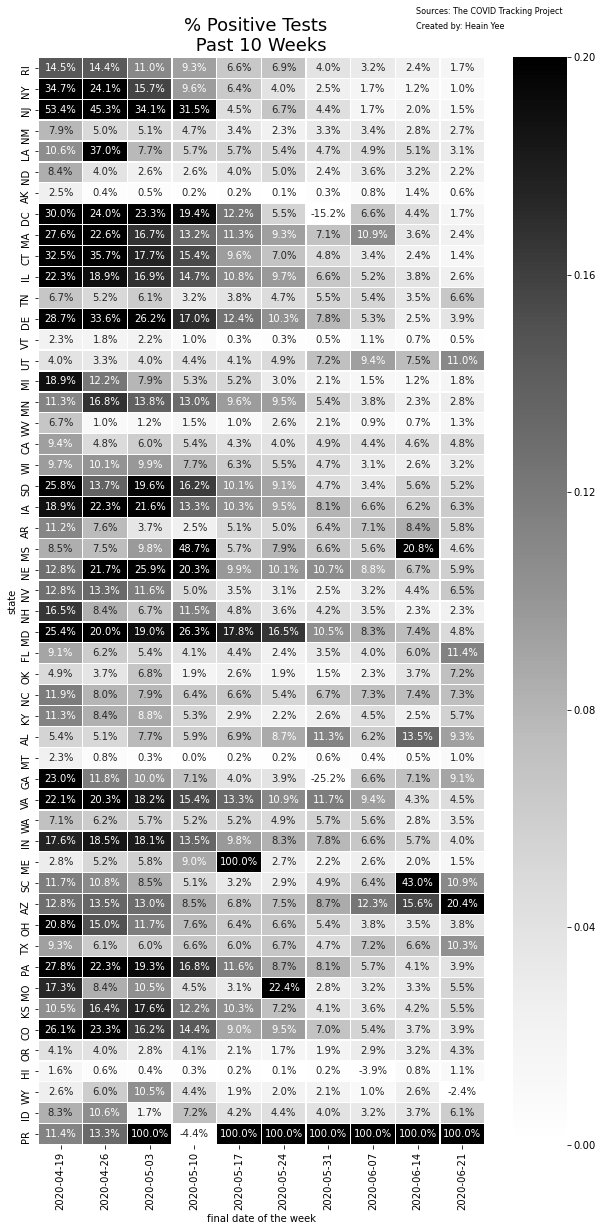

In [25]:
max_scale_positives = .2

fig, ax = plt.subplots(figsize=(10,20))
title = "% Positive Tests  \n Past 10 Weeks "

plt.title(title, fontsize=18)

sns.heatmap(weekly_pos_total_pivot_final, cmap = 'Greys', linewidths = 0.30, annot =True, fmt = '.1%', ax=ax, vmax = max_scale_positives, vmin = 0,)

plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.65, .90, textstr, fontsize=8)

plt.savefig("images/HM_positive%")

plt.show()

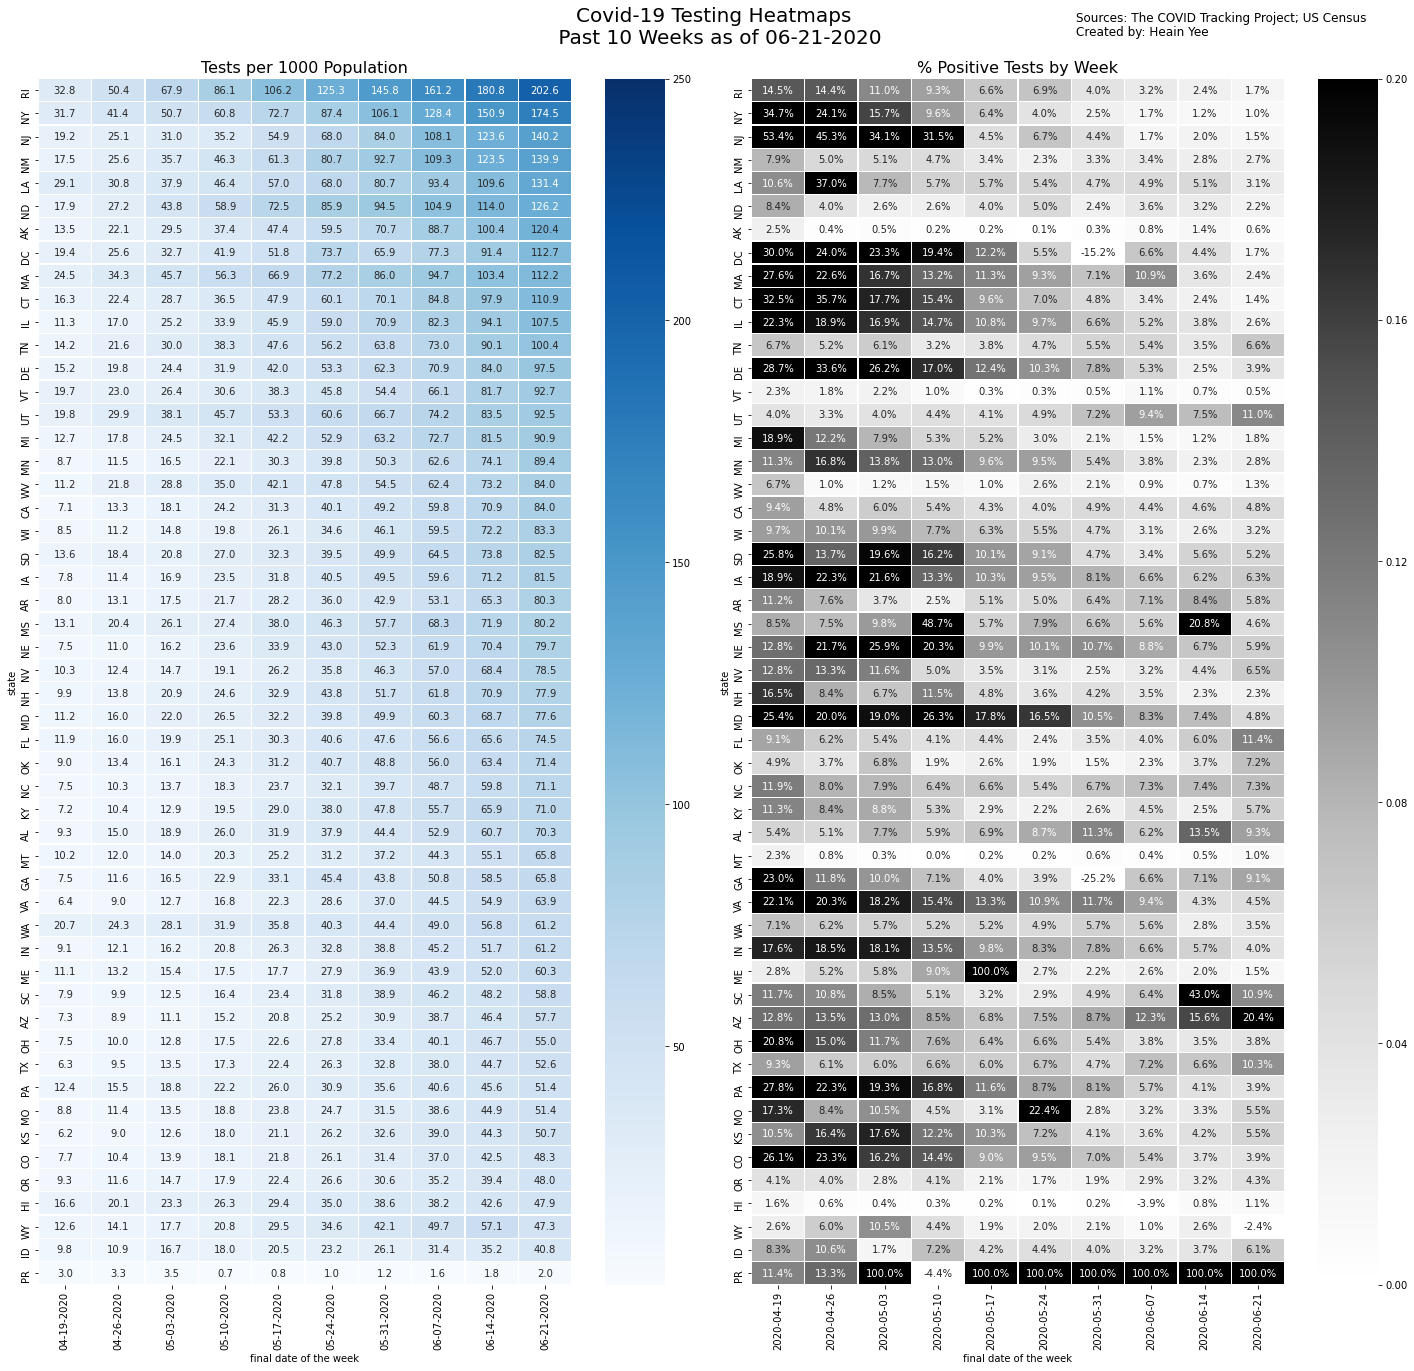

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
title = f"Covid-19 Testing Heatmaps \n Past 10 Weeks as of {today}"
fig.suptitle(title, fontsize=20)

ax1.set_title("Tests per 1000 Population", fontsize=16)
sns.heatmap(state_daily_test_pivot_final, cmap = 'Blues', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax1, vmax = max_scale_tests, cbar="False")

ax1.set_xlabel ("final date of the week")

ax2.set_title("% Positive Tests by Week", fontsize=16)
sns.heatmap(weekly_pos_total_pivot_final, cmap = 'Greys', linewidths = 0.30, annot =True, fmt = '.1%', ax=ax2, vmax = max_scale_positives, vmin = 0, cbar = "False")

plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .97, textstr, fontsize=12)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .96, textstr, fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/HM_testing_all")

plt.show()

# Creating Scatterplots
You want to see high levels of tests per capita and decreasing levels of positive tests.

In [27]:
state_current_analysis_df = state_current_analysis_df.reset_index(drop=True)
state_current_analysis_df.head()

,full_date,state,positive,totaltestresults,2019 population,tests per 1000,positives per 1000,positives%
0,06-24-2020,AK,778,92947,731545,127.055752,1.063503,0.008370
1,06-24-2020,AL,31097,354038,4903185,72.205719,6.342204,0.087835
2,06-24-2020,AR,16678,264492,3017804,87.643863,5.526535,0.063057
3,06-24-2020,AZ,58179,440518,7278717,60.521380,7.993030,0.132070
4,06-24-2020,CA,183073,3496929,39512223,88.502462,4.633326,0.052353


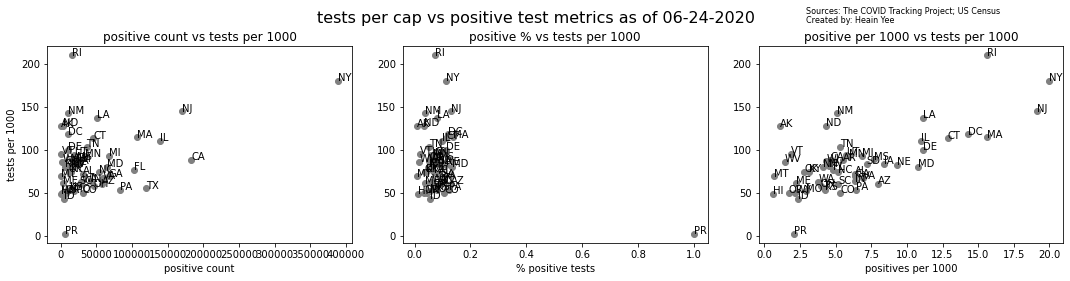

In [28]:
posperc = state_current_analysis_df['positives%']
pospercap = state_current_analysis_df['positives per 1000']
poscount = state_current_analysis_df['positive']
testspercap = state_current_analysis_df['tests per 1000']
varlabel = state_current_analysis_df['state']


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
date = state_current_analysis_df['full_date'][0]
title = f"tests per cap vs positive test metrics as of {date}"
fig.suptitle(title, fontsize=16)

axes[0].set_ylabel("tests per 1000")

axes[0].set_title("positive count vs tests per 1000")
axes[0].plot(poscount, testspercap, 'o', label = varlabel, color='gray')
axes[0].set_xlabel("positive count")

axes[1].set_title("positive % vs tests per 1000")
axes[1].plot(posperc, testspercap, 'o', label = varlabel, color='gray')
axes[1].set_xlabel("% positive tests")
    
axes[2].set_title("positive per 1000 vs tests per 1000")
axes[2].plot(pospercap, testspercap, 'o', label = varlabel, color='gray')
axes[2].set_xlabel("positives per 1000")

for i, txt in enumerate(varlabel):
    axes[0].annotate(txt, (poscount[i], testspercap[i]))
    axes[1].annotate(txt, (posperc[i], testspercap[i]))
    axes[2].annotate(txt, (pospercap[i], testspercap[i]))


textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .97, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .94, textstr, fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/SC_tests-positive_all")

plt.show()

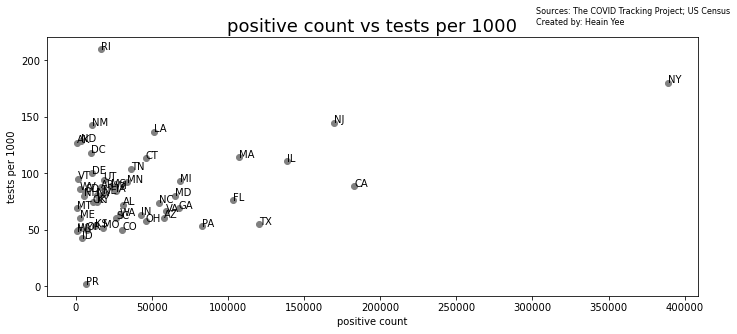

In [29]:
fig = plt.subplots(figsize=(10,5))
title = "positive count vs tests per 1000"

plt.title(title, fontsize=18)

x = state_current_analysis_df['positive']
y = state_current_analysis_df['tests per 1000']
label = state_current_analysis_df['state']

plt.plot(x, y, 'o', label = label, color='gray');

for i, txt in enumerate(varlabel):
    plt.annotate(txt, (x[i], y[i]))

plt.xlabel("positive count")
plt.ylabel("tests per 1000")
    
    
textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .93, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .90, textstr, fontsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/SC_tests-positivecount")

plt.show()

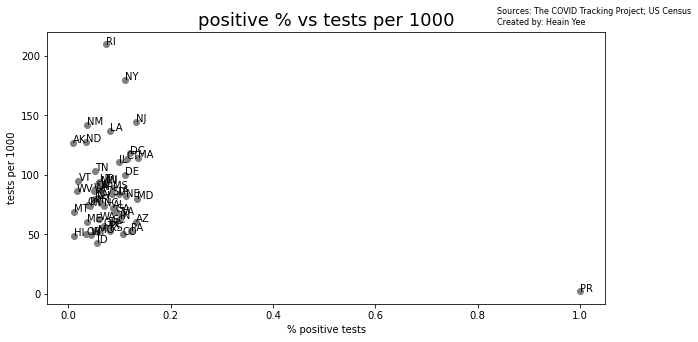

In [30]:
fig = plt.subplots(figsize=(10,5))
title = "positive % vs tests per 1000"

plt.title(title, fontsize=18)

x = state_current_analysis_df['positives%']
y = state_current_analysis_df['tests per 1000']
varlabel = state_current_analysis_df['state']

plt.plot(x, y, 'o', label = varlabel, color='gray');

for i, txt in enumerate(varlabel):
    plt.annotate(txt, (x[i], y[i]))
    
plt.xlabel("% positive tests")
plt.ylabel("tests per 1000")

textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .93, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .90, textstr, fontsize=8)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("images/SC_tests-positive%")

plt.show()

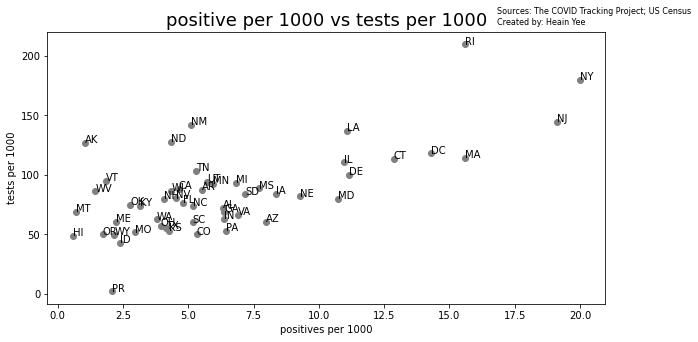

In [31]:
fig = plt.subplots(figsize=(10,5))
title = "positive per 1000 vs tests per 1000"

plt.title(title, fontsize=18)


x = state_current_analysis_df['positives per 1000']
y = state_current_analysis_df['tests per 1000']
label = state_current_analysis_df['state']

plt.plot(x, y, 'o', label = label, color='gray');

for i, txt in enumerate(varlabel):
    plt.annotate(txt, (x[i], y[i]))

plt.xlabel("positives per 1000")
plt.ylabel("tests per 1000")
    
    
textstr = "Sources: The COVID Tracking Project; US Census"
plt.gcf().text(.75, .93, textstr, fontsize=8)

textstr = "Created by: Heain Yee"
plt.gcf().text(.75, .90, textstr, fontsize=8)

plt.savefig("images/SC_tests-positivepercap")

plt.show()